In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [3]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [4]:
e.lames.shape

(4, 31)

## Point-Line Distance--2-Dimensional

See http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html


In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

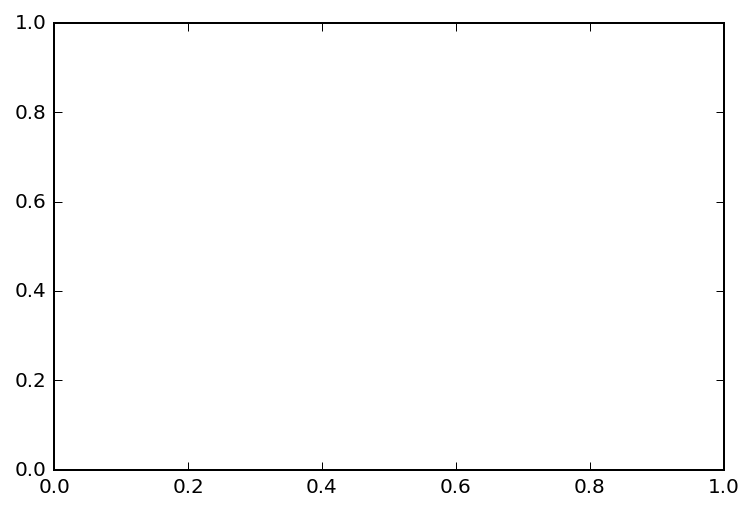

In [9]:
particles = np.array([[.5, .3], [-.5, .3], [.3, .5]])

plt.scatter(particles[0, 0], particles[1, 0], 'b')
plt.plot(particles[0,1:], particles[1, 1:], 'r')
plt.xlim([-1, 1])
plt.ylim([0, 1])

In [31]:
import MotionParticles as mp


  if self._edgecolors == str('face'):



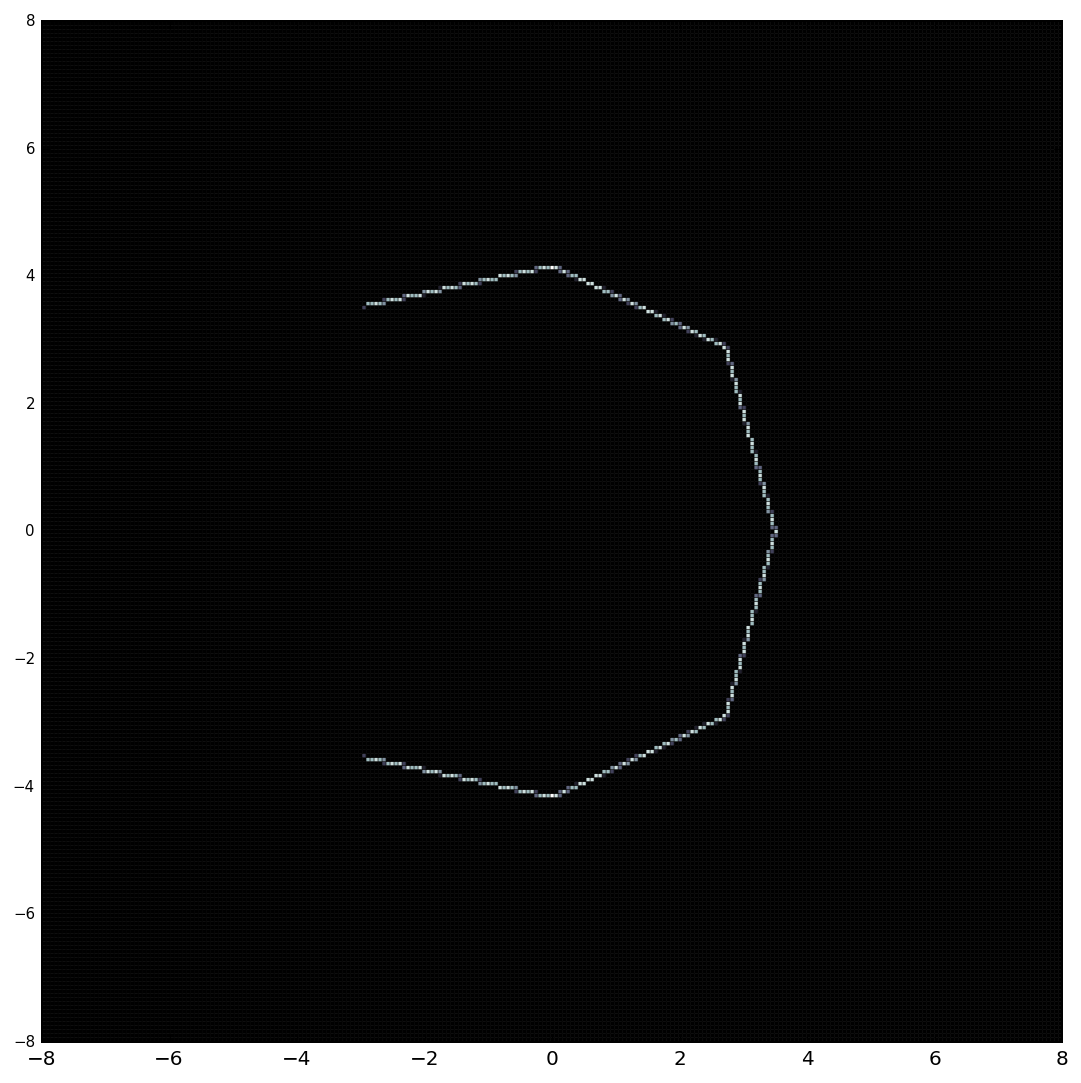

In [32]:
fig, ax = mp.spatial_readout(particles, N_X=256, N_Y=256, N_quant=256, hue=False, width=e.total_width*2)

  if self._edgecolors == str('face'):



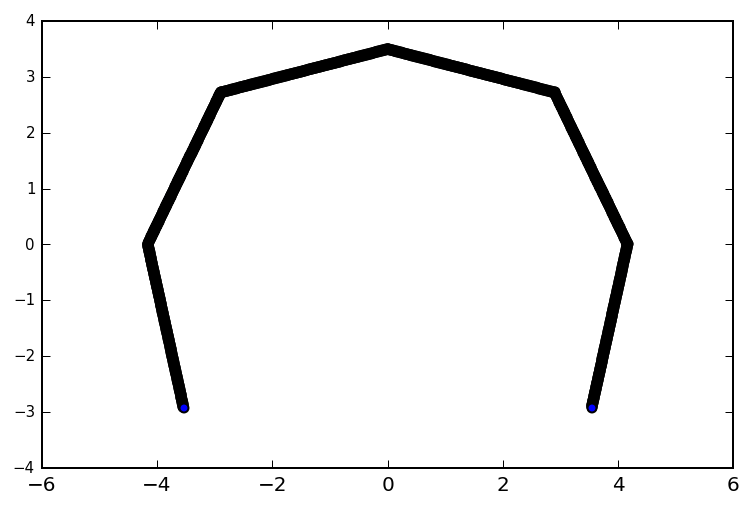

In [33]:
e.sample_structure()
plt.scatter(e.particles[0,:], e.particles[1,:])

## generating a trajectory

(-8, 8)

  if self._edgecolors == str('face'):



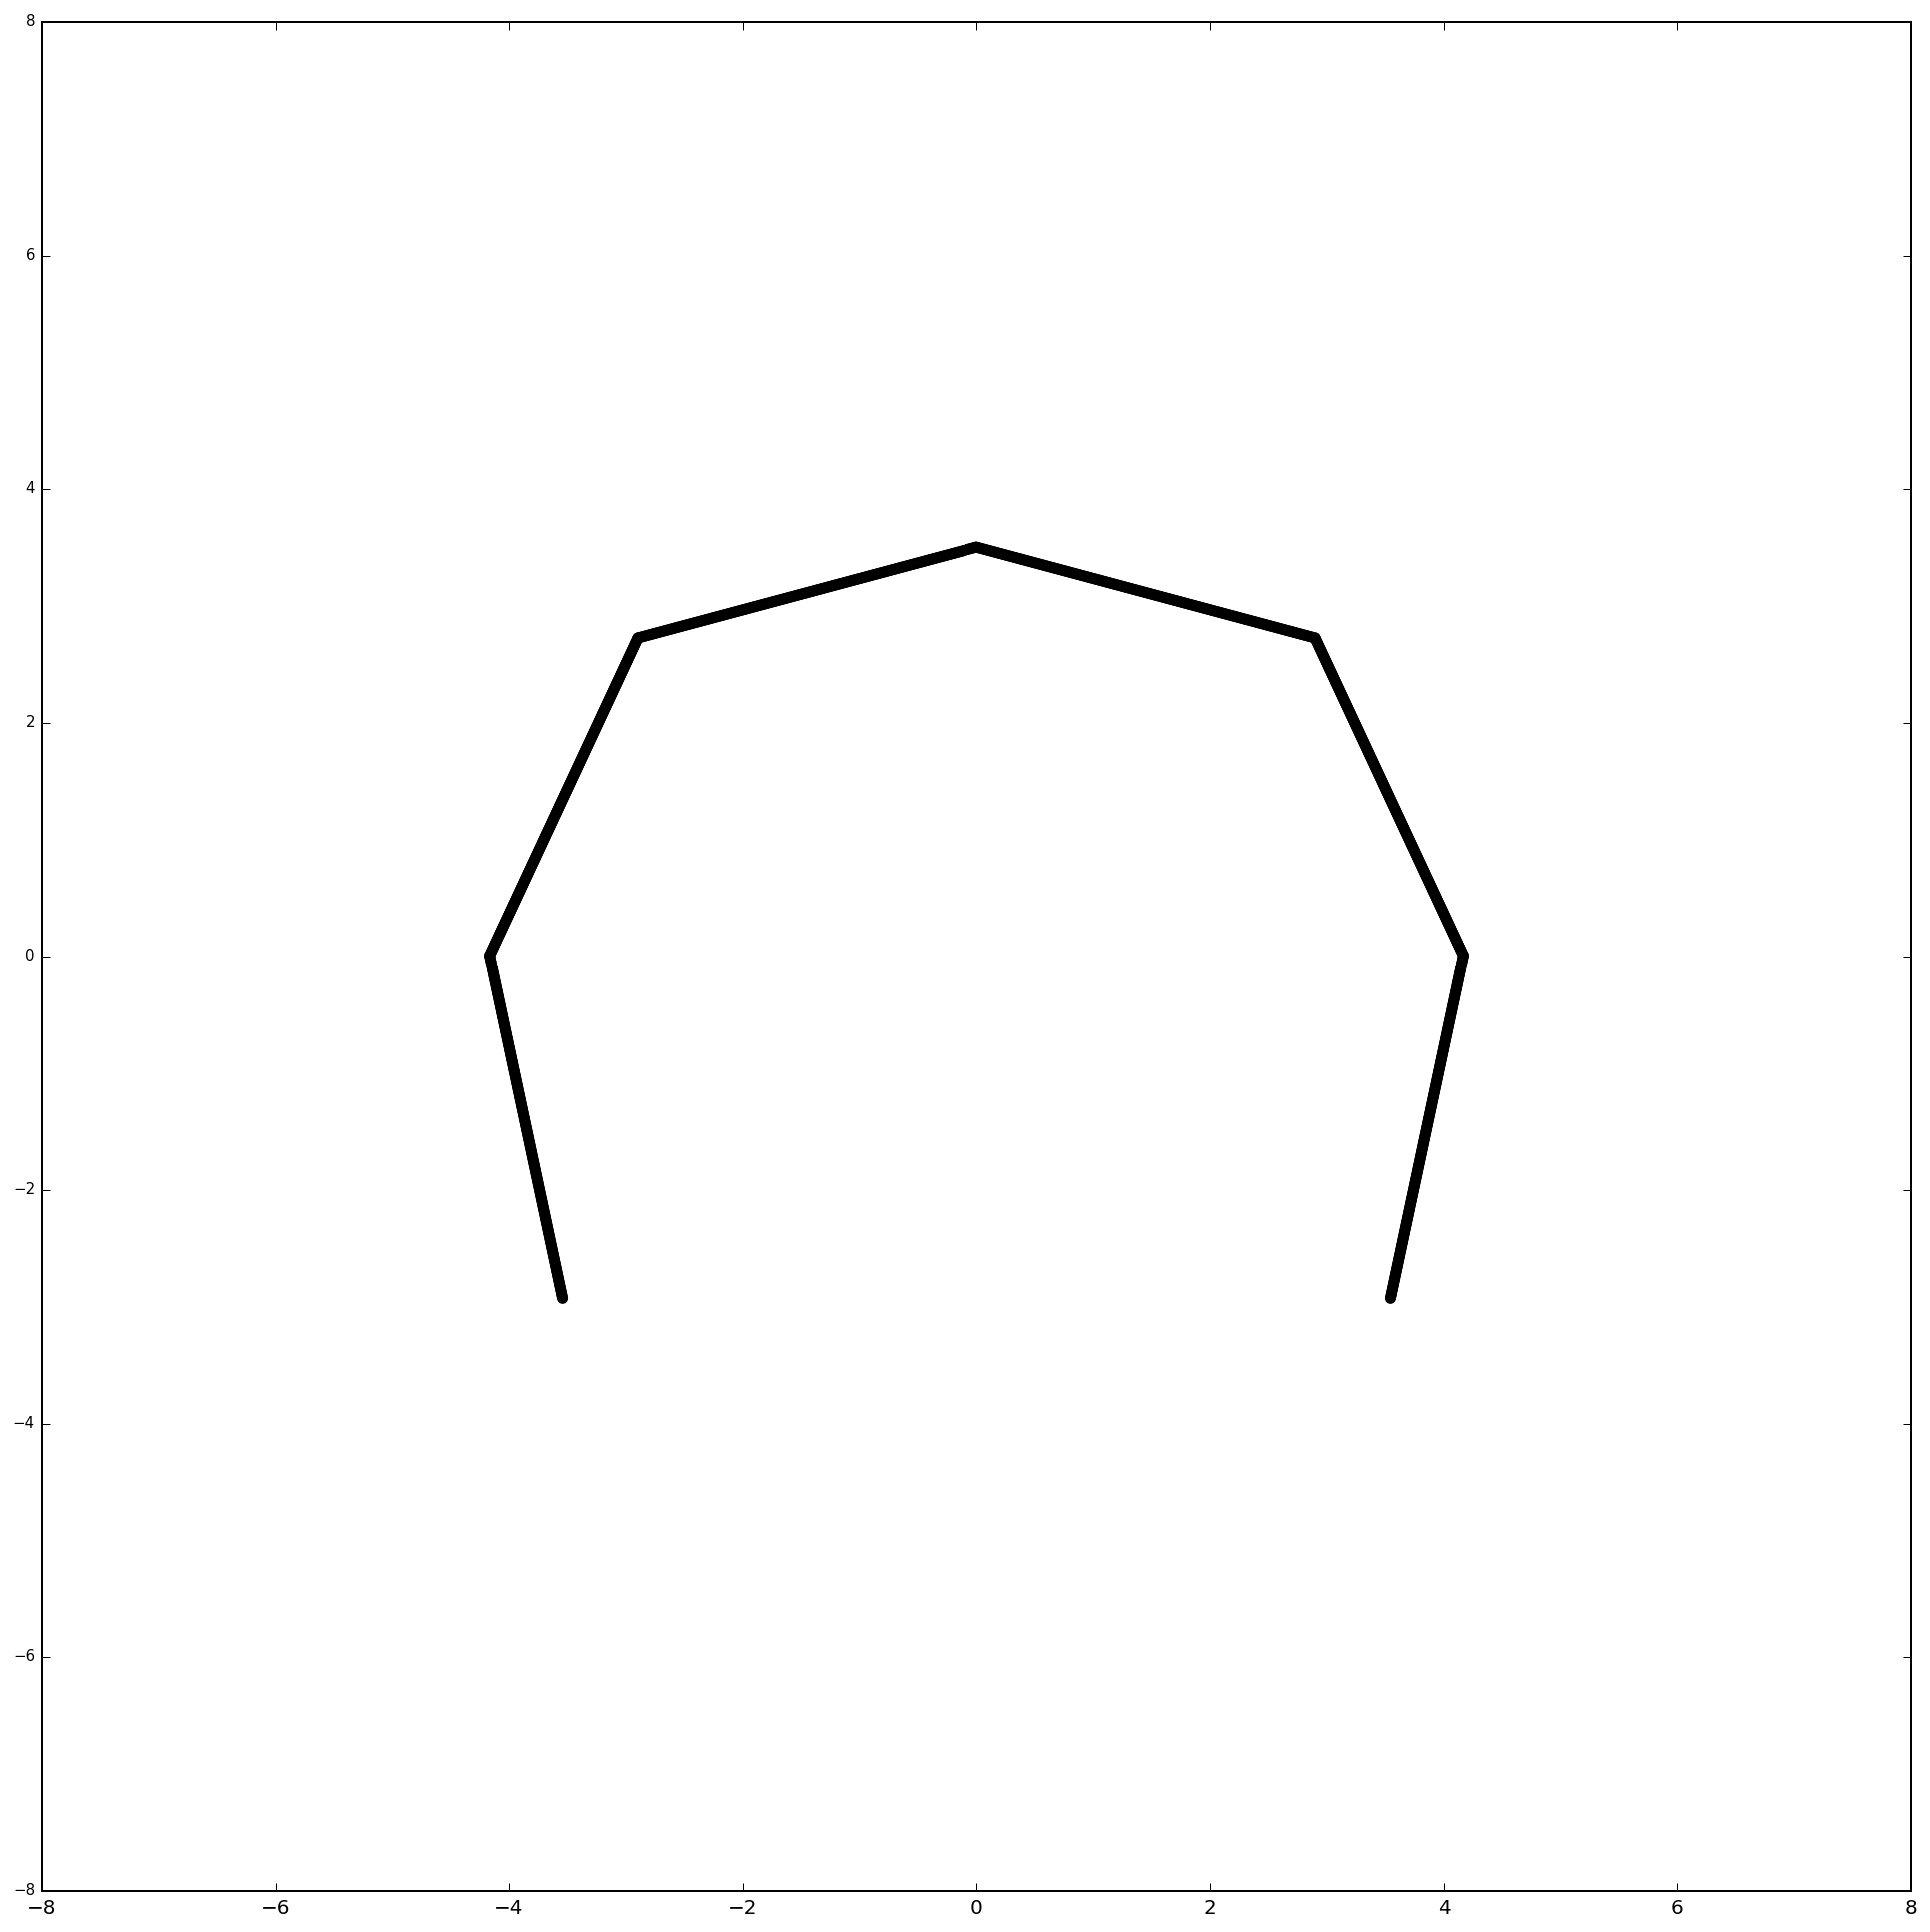

In [34]:
import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']


class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] - self.total_width/4.
        zf = lambda t: location[2] * (.5 + .45 * np.sin(2*np.pi*self.t*tf/duration))
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig = plt.figure(figsize=(e.figsize, e.figsize))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[1,:])
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])

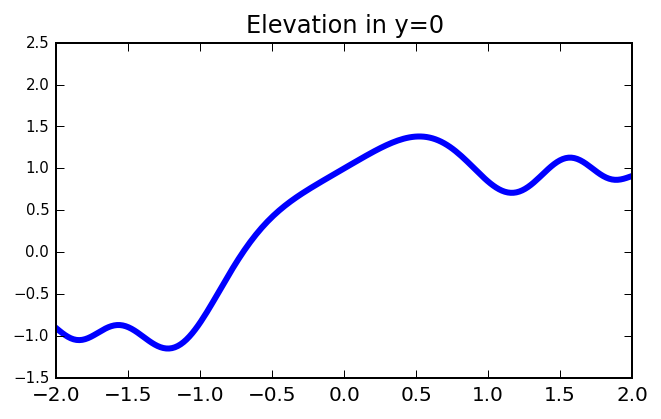

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

In [36]:
fps = 25.
# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.
def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

  if self._edgecolors == str('face'):



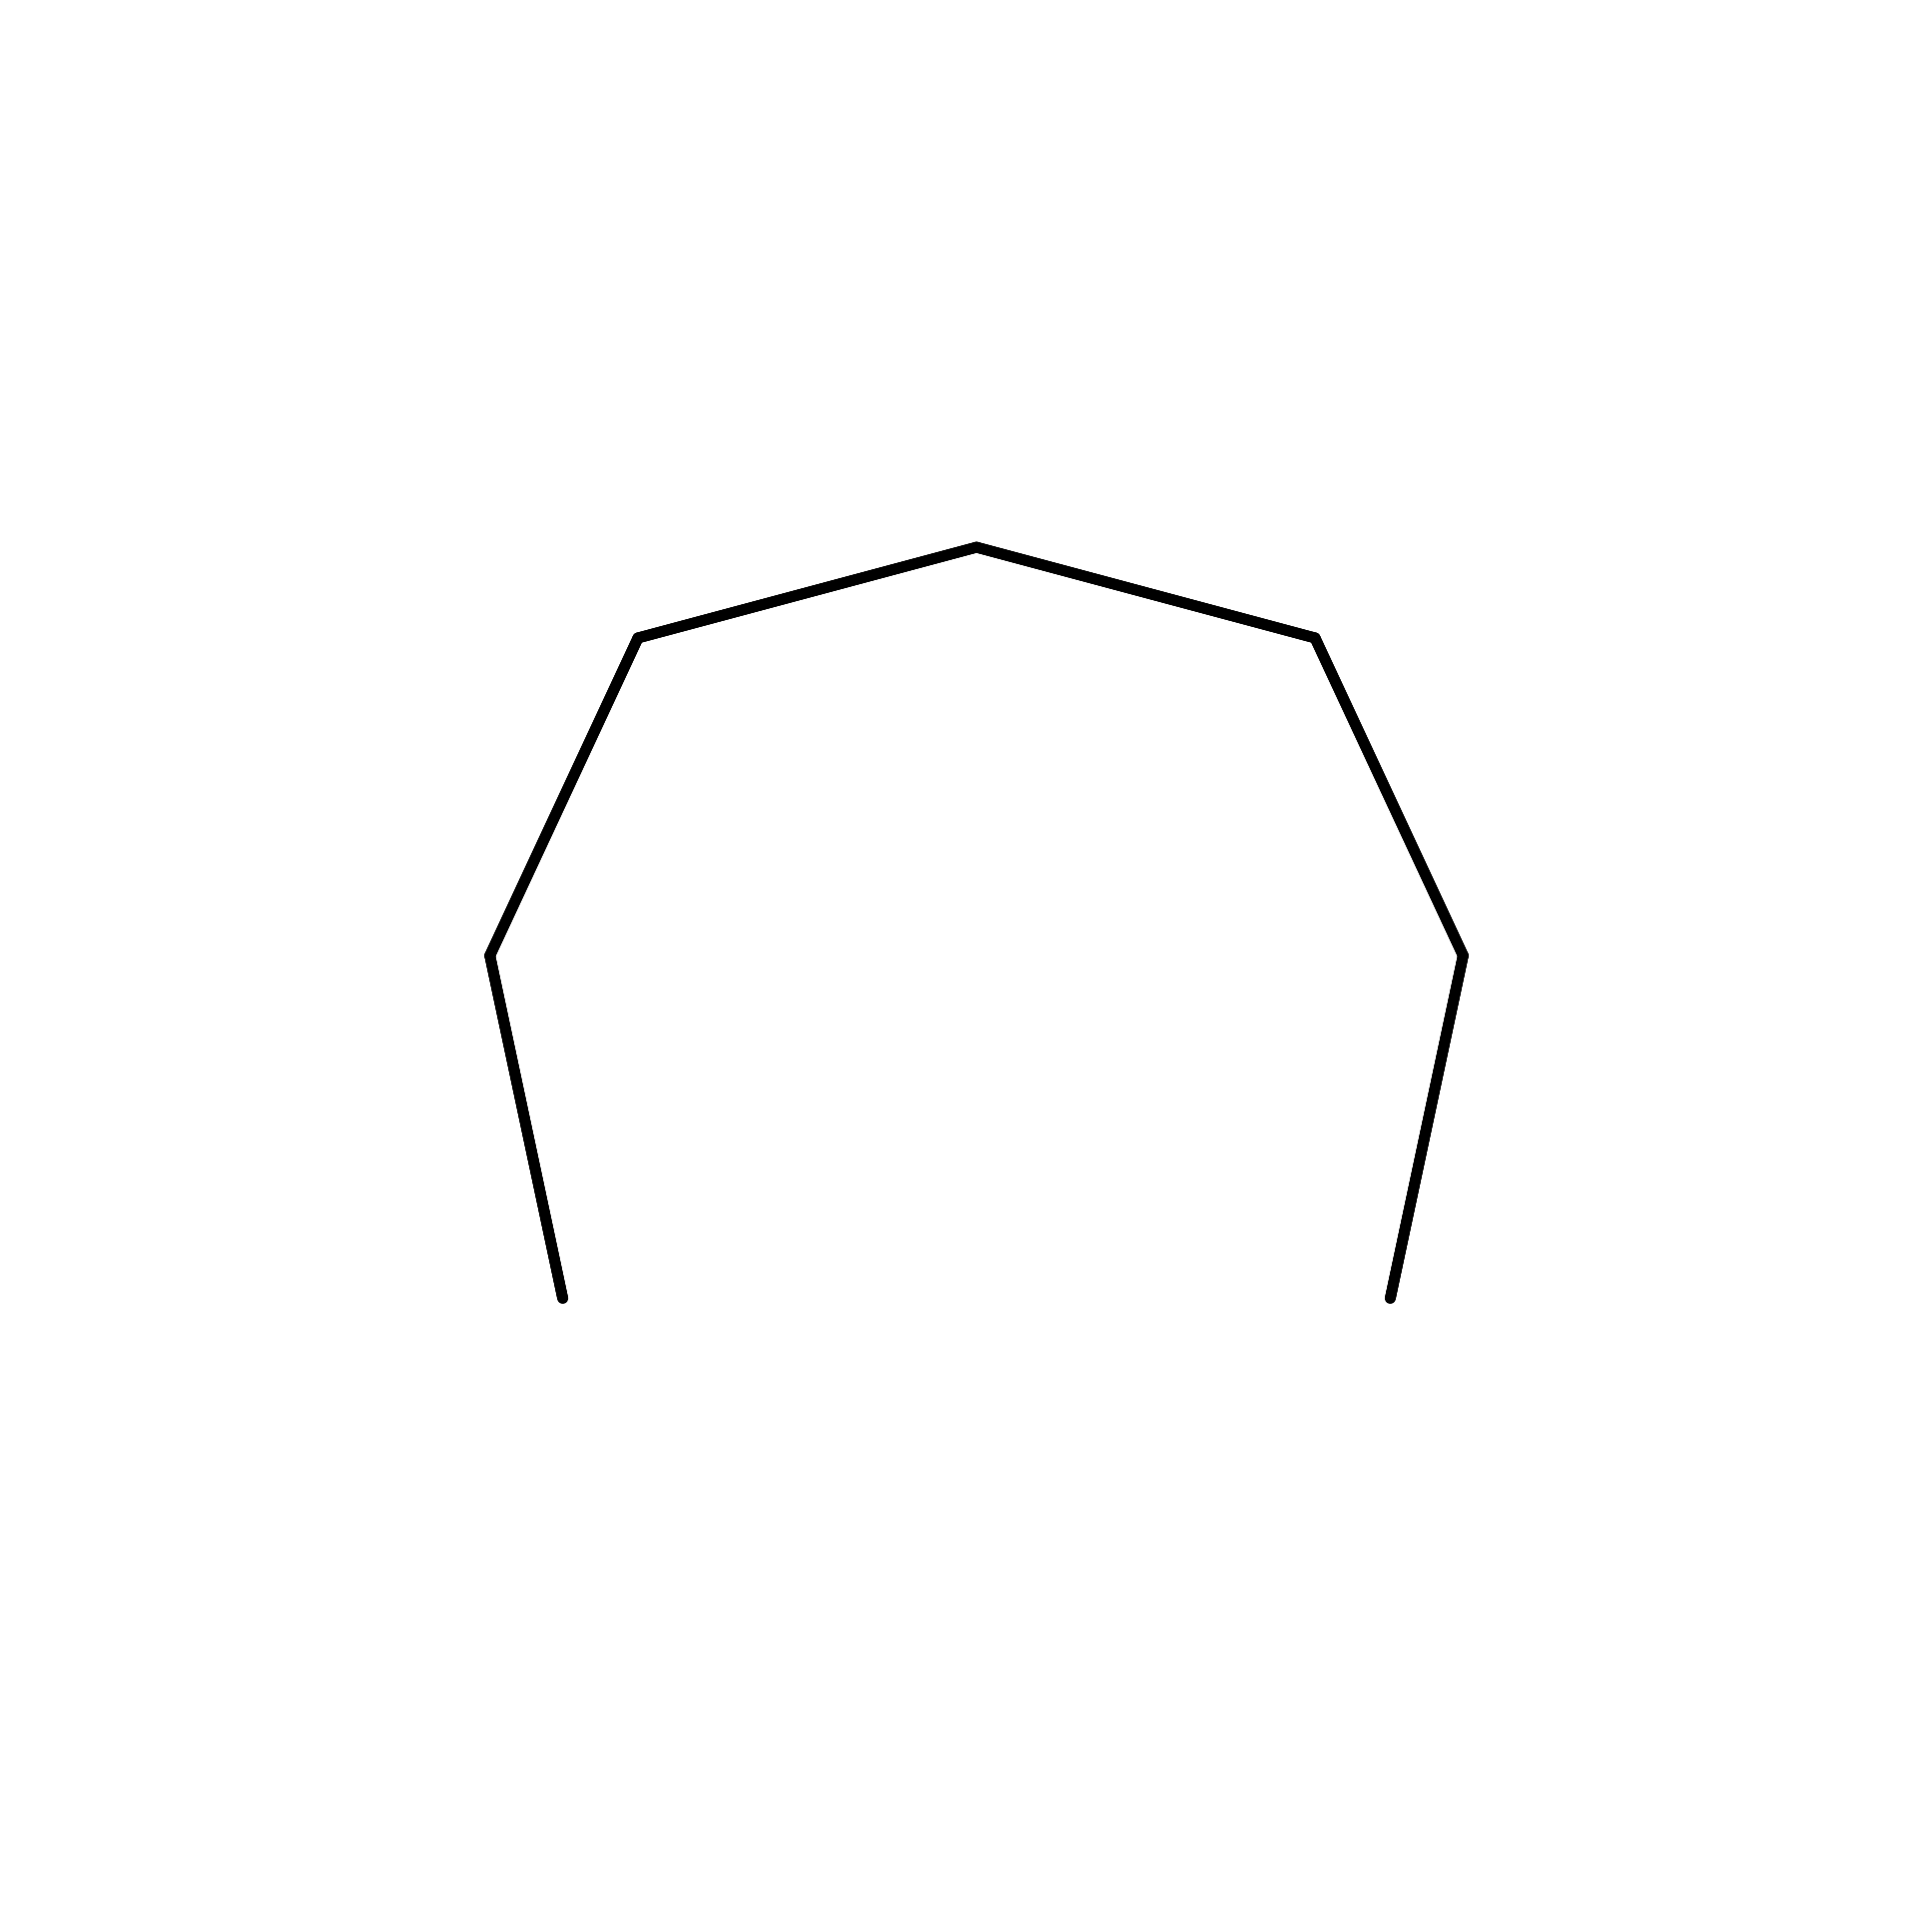

In [37]:
e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig = plt.figure(figsize=(e.figsize, e.figsize))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.axis('off')
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])
scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:])

In [38]:
fps = 10.
e.dt = 1./fps
opts = dict(vmin=0, vmax=1., linewidths=0, cmap=plt.cm.bone)
def make_frame_mpl(t):    
    #ax.clear()
    e.particles[2,:] = .5 + .5*np.sin(t*2*np.pi) 
    scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:], **opts)
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

  if self._edgecolors == str('face'):



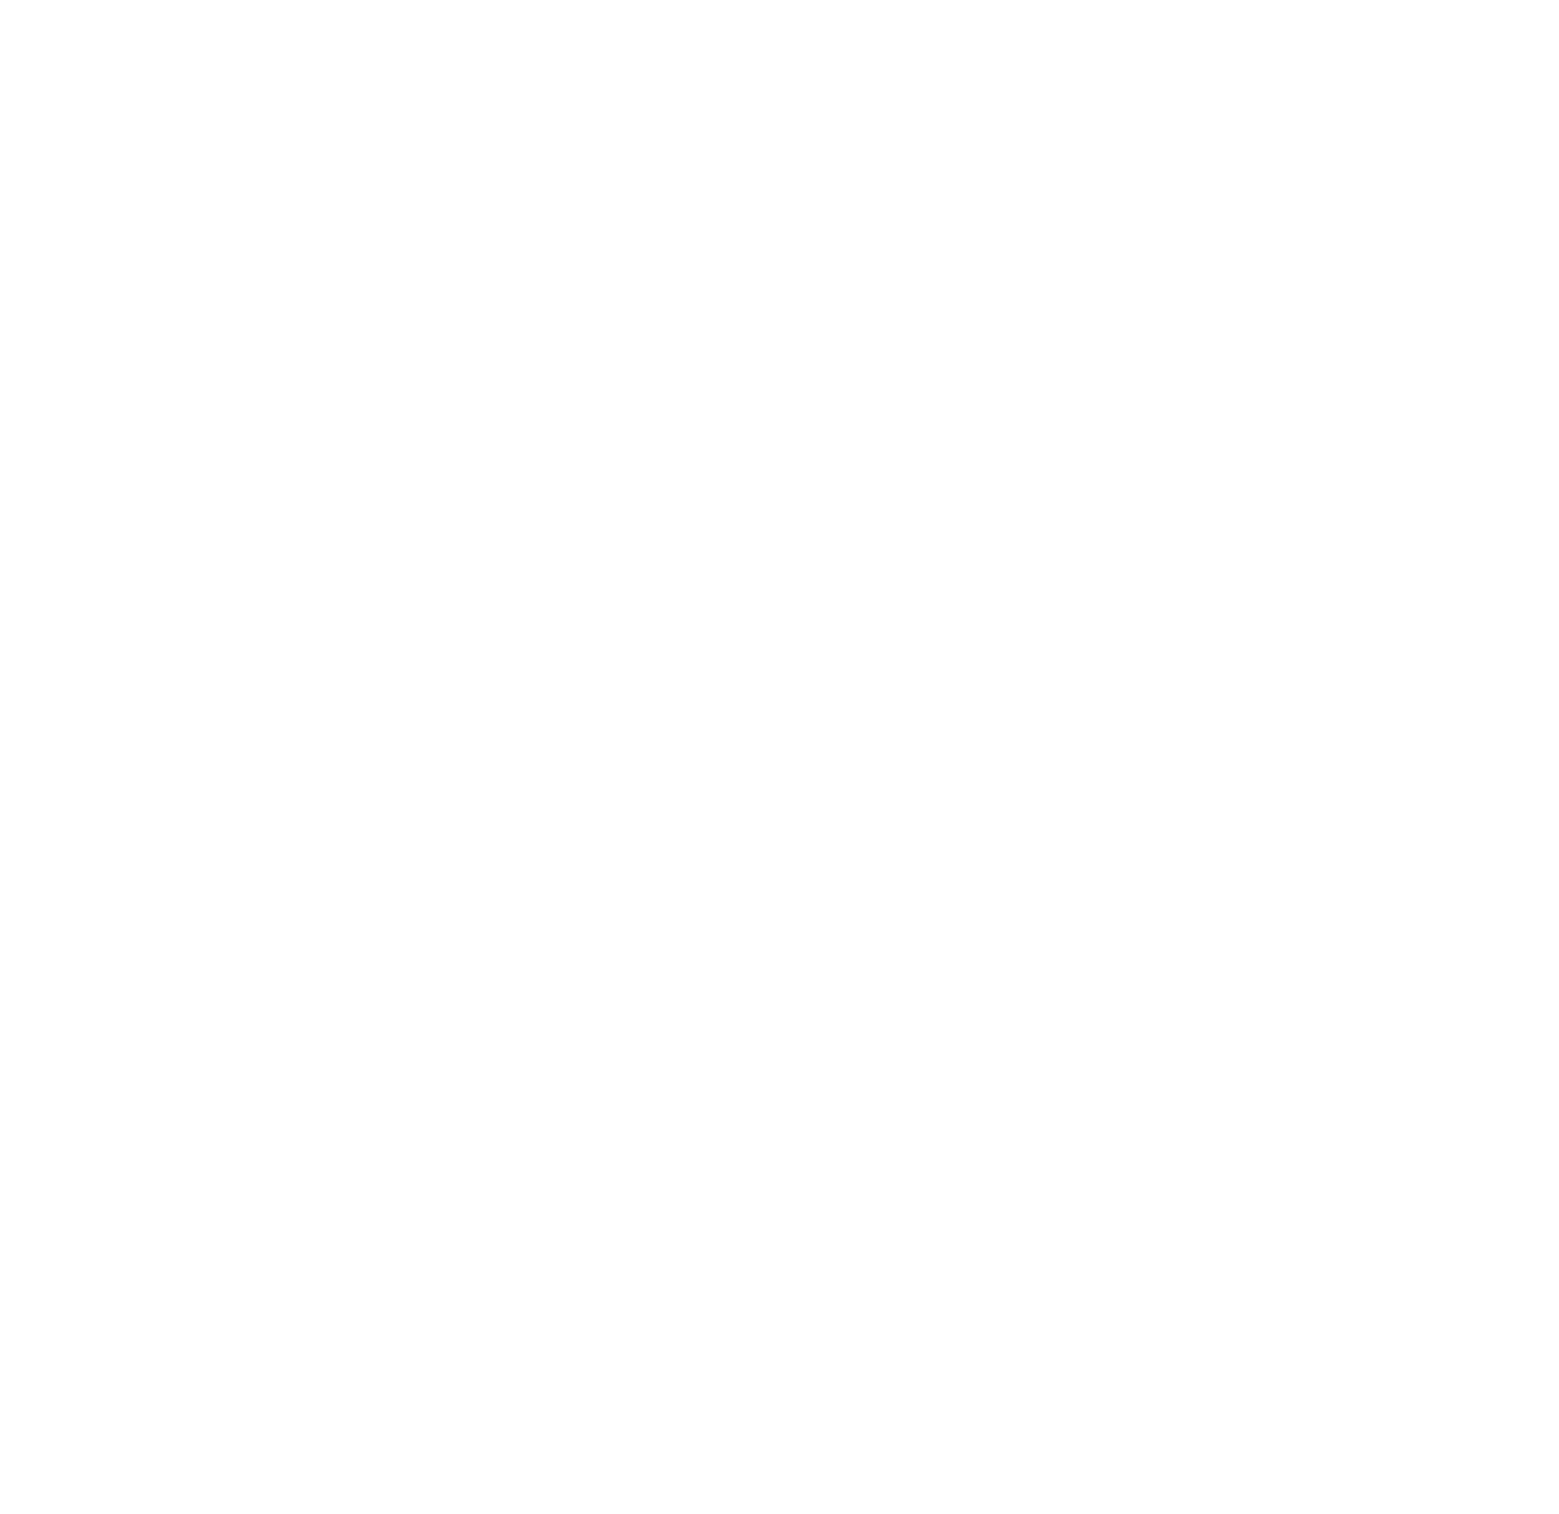

In [39]:
import elasticite as el
import numpy as np

class EdgeGrid(el.EdgeGrid):
    def update_particles(self):
        self.particles[2,:] =  .5 + .5*np.cos((self.t + np.linspace(0, 1., self.N_particles))*2*np.pi)

    def update(self):
        self.update_particles()

e = EdgeGrid(N_lame=25, grid_type='line')
fig, ax = plt.subplots(1, 1, figsize=(e.figsize, e.figsize))
ax.axis('off')
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])

#ax = fig.add_axes((0, 0, 1, 1), axisbg='w')
fps = 10.
e.dt = 1./fps
opts = dict(vmin=0, vmax=1., linewidths=0, cmap=plt.cm.bone)
#print(opts)

In [40]:
def make_frame_mpl(t):    
    ax.clear()
    ax.axis('off')
    ax.set_xlim([-e.total_width, e.total_width])
    ax.set_ylim([-e.total_width, e.total_width])

    e.t = t
    e.update()
    scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:], **opts)
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

  if self._edgecolors == str('face'):



All in one call:

In [41]:
class EdgeGrid(el.EdgeGrid):
    def update_particles(self):
        self.particles[2,:] =  .5 + .5*np.cos((self.t + np.linspace(0, 1., self.N_particles))*2*np.pi)

    def update(self):
        self.update_particles()

e = EdgeGrid(N_lame=25, grid_type='line')
e.animate()

  if self._edgecolors == str('face'):



## git


In [42]:
!git s
#!git add 2015-10-27\ élasticité\ expansion.ipynb

 M "2015-10-27 \303\251lasticit\303\251 expansion-r\303\251action diffusion.ipynb"
?? ../.ipynb_checkpoints/
?? ../PLAN_PRINCIPE_PROTO/
?? ../Presentation-Dossier-Artistique/
?? ../TESTS_TRAME/
?? ../__temp_ipython__.png
?? ../files/elastic_fresnel.mp4
?? ../files/elastic_fresnel_gauche.mp4
?? ../files/elastic_fresnel_lateral.mp4
?? ../files/elastic_fresnel_pasapas.mp4
?? ../files/elastic_fresnel_rot.mp4
?? ../files/fresnel.mp4
?? "../files/grille_carr\303\251e.mp4"
?? ../files/lames_contraintes.mp4
?? ../files/lames_oscillantes.mp4
?? ../files/lames_oscillantes_fps5.mp4
?? "../notes-Laurent/2015-10-22_\303\251lasticit\303\251 LAMES-Dynamique_pdf.pdf"
?? .ipynb_checkpoints/
?? __temp__.mp4
?? __temp_ipython__.png
?? anim.gif
?? ../screenshot.png
?? ../src/elasticite.egg-info/


In [43]:
!git commit -am' expansion - function de samples sur la structure - all in one call'

[master 374f2b2]  expansion - function de samples sur la structure - all in one call
 1 file changed, 85 insertions(+), 10 deletions(-)


In [44]:
! git push


Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 141.42 KiB | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: 
remote: ========================================================================
remote: 
remote:       Mise à jour de Gitlab mardi 27 octobre à partir de 19h. Voir
remote:                       https://status.framasoft.org
remote: 
remote: ========================================================================
To git@git.framasoft.org:laurentperrinet/elasticte.git
   1db96f9..374f2b2  master -> master
